In [236]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd
import requests

In [237]:
df = pd.read_csv('rideshare_kaggle.csv')

In [238]:
missing_df = df[df.isnull().any(axis=1)]
missing_df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
693047,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693049,885ef635-299e-45cf-8052-c45a39e9822a,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693060,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


In [239]:
df = df.dropna()
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [240]:
categorical_features = []
numerical_features = []

# IV. Exploratory Data Analysis
> ## Dataset Analysis
>> ### Shape

In [241]:
df.shape

(637976, 57)

>> ### Data Types

In [242]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

>> ### Sample Inspection

In [243]:
df.head(8)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


>> ### Fixing Index

In [244]:
df.index = df.pop('id')

>> ### Fixing Types

In [245]:
for col in df.columns:
    if 'time' in col.lower():
        try:
            # df[col] = pd.to_datetime(df[col], unit='s').timestamp()
            print(col)
        except:
            pass

timestamp
datetime
timezone
windGustTime
temperatureHighTime
temperatureLowTime
apparentTemperatureHighTime
apparentTemperatureLowTime
sunriseTime
sunsetTime
uvIndexTime
temperatureMinTime
temperatureMaxTime
apparentTemperatureMinTime
apparentTemperatureMaxTime


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 424553bb-7174-41ea-aeb4-fe06d4f4b9d7 to e7fdc087-fe86-40a5-a3c3-3b2a8badcbda
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    637976 non-null  float64
 1   hour                         637976 non-null  int64  
 2   day                          637976 non-null  int64  
 3   month                        637976 non-null  int64  
 4   datetime                     637976 non-null  object 
 5   timezone                     637976 non-null  object 
 6   source                       637976 non-null  object 
 7   destination                  637976 non-null  object 
 8   cab_type                     637976 non-null  object 
 9   product_id                   637976 non-null  object 
 10  name                         637976 non-null  object 
 11  price                        637976 non-null  float64
 12

In [247]:
df

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
id,,,,,,,,,,,,,,,,,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [248]:
def date_to_cyclic_signal(x):
    return np.sin(2 * np.pi * x), np.cos(2 * np.pi * x)

In [249]:
df.timestamp = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S').astype(np.int64) / 1e9

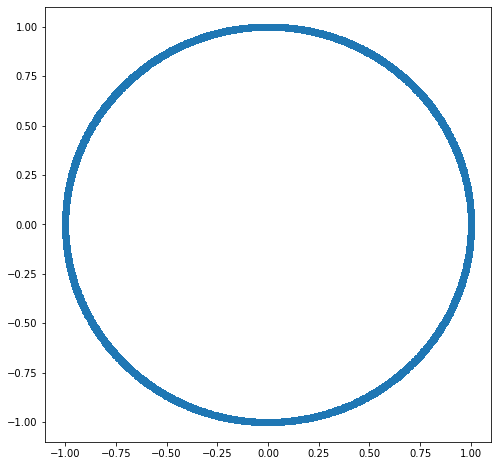

In [250]:
day_seconds = 24 * 60 * 60
week_seconds = 7 * day_seconds

plt.figure(figsize=(8, 8))
t = df.timestamp.sort_values().values / day_seconds
a = df.timestamp.sort_values().values / week_seconds
t, t_ = date_to_cyclic_signal(t)
a, a_ = date_to_cyclic_signal(a)

df['hour_sin'] = t
df['hour_cos'] = t_
df['week_sin'] = a
df['week_cos'] = a_

plt.scatter(t, t_)

In [251]:
df

,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,...,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,hour_sin,hour_cos,week_sin,week_cos
id,,,,,,,,,,,,,,,,,,,,,
424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,...,43.68,1544968800,33.73,1545012000,38.07,1544958000,0.821066,0.570833,-0.553374,-0.832933
4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,...,47.30,1543251600,36.20,1543291200,43.92,1543251600,0.821066,0.570833,-0.553374,-0.832933
981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,...,47.55,1543320000,31.04,1543377600,44.12,1543320000,0.821066,0.570833,-0.553374,-0.832933
c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,45.03,1543510800,30.30,1543550400,38.53,1543510800,0.821066,0.570833,-0.553374,-0.832933
e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,...,42.18,1543420800,29.11,1543392000,35.75,1543420800,0.821066,0.570833,-0.553374,-0.832933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,-0.946696,0.322128,-0.879658,0.475606
616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,-0.946696,0.322128,-0.879658,0.475606
633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,-0.946696,0.322128,-0.879658,0.475606


>> ### Column Meaning
>>> #### ID
>>> as we can see from the sample data, the ID column is most likely to be the primary key of the dataset. in my suspicion, the ID column is not useful in the model because it is just a unique identifier even though it is not a numerical value. because in some databases the primary id is randomly generated and saved as encoded string like mongodb
>>>
>>> **let's see if I can validate my assumption.**
>>>
>>>> I will check the ID column against online UUID [`(Universally Unique Identifier library)`](https://www.uuidtools.com/decode) Decoder if it can decode the ID then my first assumption is correct.
>>>> and from the code result bellow we can see that the api is successfully decoding the ID column. and from that we can see that it is was UUID Version 4.
>>>>
>>>> **And What it Means?**
>>>> UUID Version 4 is a random generated UUID.
>>>>
>>>> **How do I know if it is Randomly Generated?**
>>>> Lets open the `International Standard (ISO)` Bible `(ISO/IEC 11578:1996)` and read the section on [`uuid - Universally Unique Identifier library`](http://ftp.riken.jp/Linux/cern/slc61/x86_64/SLC/repoview/uuid.html)

In [252]:
requests.get('https://www.uuidtools.com/api/decode/424553bb-7174-41ea-aeb4-fe06d4f4b9d7').json()

{'encode': {'STR': '424553bb-7174-41ea-aeb4-fe06d4f4b9d7',
  'SIV': '88089014495819196761931943528637970903'},
 'decode': {'variant': 'DCE 1.1, ISO/IEC 11578:1996',
  'version': '4 (random data based)',
  'contents': '42:45:53:BB:71:74:01:EA:2E:B4:FE:06:D4:F4:B9:D7\n(no semantics: random data only)'}}

>>>> **What was the result?**
>>>> this is the version description
>>>> - version1 (time and node based)
>>>> - version 3 (name based, MD5)
>>>> - version 4 (random number based)
>>>> - version 5 (name based, SHA-1)
>>>>
>>>> from those result we can see that version 4 truly is random number based and
>>>> **it is not useful at all for any kind of information processing. Except Document Identifier**
> so I will use the ID column from the dataset as index.

>>> #### TimeStamp, Hour, Month, DateTime
>>> the timestamp column is the time when the data was collected. and the name of column is self-explanatory.
>>>> **Do it Useful?**
>>>> Yep it is useful. but the column has similarity with `hour`, `date`, `month` and `datetime` column, why? because it all of this column was generated using the timestamp column.
>>>> **so I will keep some column and drop the similar one.**

In [255]:
_data = train_df.groupby('hour').sum()
_data = _data.price / _data.distance
_data

hour
0     7.581720
1     7.573383
2     7.552165
3     7.557765
4     7.609826
5     7.587002
6     7.545699
7     7.582429
8     7.549984
9     7.544324
10    7.483556
11    7.593080
12    7.553881
13    7.596813
14    7.537360
15    7.491344
16    7.595117
17    7.548889
18    7.519464
19    7.522752
20    7.555536
21    7.527808
22    7.585963
23    7.586925
dtype: float64

In [215]:
# categorical_features.append('hour')
# categorical_features.append('day')
# categorical_features.append('month')

>>> #### TimeZone
>>> the timezone column is the time zone of the data.
>>>> **Do it Useful?**
>>>> Yes it should be but in this case It is **not useful in this dataset** because the timezone is **the same for all the data**.
>>>> **How do I Know that?**
>>>> let's see how many timezone are there in the dataset.

In [216]:
print(f"There are {len(df['timezone'].unique())} timezone in the dataset")

There are 1 timezone in the dataset


>>>> **What is the result?**
>>>> as you can see from the result above, there are **only one timezone in the dataset.**
>>>>
>>>> **so I will not use the timezone column from the dataset because it has no meaning at all when there is only one category in dataset.**

>>> #### Source And Destination
>>> the source column is the starting point of the ride in this case the city name. and what should we do with this column?
>>>> **Do it Useful?**
>>>> Yes it is useful

In [217]:
categorical_features.append('source')
categorical_features.append('destination')
categorical_features.append('name')
categorical_features.append('long_summary')

>>> #### Cab Type, Product ID, Name
>>> the cab type column is the type of the cab `(Uber, Lyft)`. and the product id column is the product id of the cab. and the name column is the name of the product id.
>>>> **Do all of it Useful?**
>>>> some column are not useful.
>>>>
>>>> **Why?**
>>>> because the product id and name are the same thing only represented by different value but still contain the same information `product id` was mean for unique identifier and the name was for human reader. so I will merge the two column and drop the product id column.
>>>> **What should we do with this?**
>>>> first we will drop the product id column, and then we will merge the two column fusing them together with their corresponding value.

In [218]:
print(f"There are {len(df['cab_type'].unique())} cab type in the dataset")
print(f"There are {len(df['product_id'].unique())} product id in the dataset")
print(f"There are {len(df['name'].unique())} name in the dataset")

There are 2 cab type in the dataset
There are 12 product id in the dataset
There are 12 name in the dataset


>>> #### Sort Summary, Long Summary, Icon
>>> what are those columns? or what is their meaning?
>>>> they are column that contain the weather information. sort summary is the weather when the ride started. and long summary is the weather forcast and icon is the icon of the weather showed in UI.
>>>>
>>>> **Let's Inspect Them**

In [219]:
print(f"There are {len(df['short_summary'].unique())} values in the short summary column")
print(f"There are {len(df['long_summary'].unique())} values in the long summary column")
print(f"There are {len(df['icon'].unique())} values in the icon column")

There are 9 values in the short summary column
There are 11 values in the long summary column
There are 7 values in the icon column


>>> **Do They Have Any Correlation?**
>>>> Yes They Have, in fact they have strong correlation but why?
>>>> Because they are the same information that packet with different use. one for system and one for user and one for UI

In [220]:
df.groupby(['short_summary', 'long_summary']).count().reset_index()[['short_summary', 'long_summary', 'icon']]

,short_summary,long_summary,icon
0,Clear,Foggy in the morning.,3438
1,Clear,Light rain in the morning and overnight.,3455
2,Clear,Light rain in the morning.,3617
3,Clear,Mostly cloudy throughout the day.,31883
4,Clear,Partly cloudy throughout the day.,34394
5,Clear,Rain throughout the day.,3469
6,Drizzle,Light rain in the morning.,5183
7,Drizzle,"Rain until morning, starting again in the eve...",1542
8,Foggy,Foggy in the morning.,5136
9,Foggy,Rain in the morning and afternoon.,77


In [221]:
numerical_features.append('distance')
numerical_features.append('surge_multiplier')
numerical_features.append('hour_sin')
numerical_features.append('hour_cos')
numerical_features.append('week_sin')
numerical_features.append('week_cos')

In [222]:
df.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax

In [223]:
print(numerical_features)
print(categorical_features)

['distance', 'surge_multiplier', 'hour_sin', 'hour_cos', 'week_sin', 'week_cos']
['source', 'destination', 'name', 'long_summary']


In [224]:
TRAINING_RATIO = 0.8
TEST_SAMPLE = 32

In [225]:
split_label = lambda _df: (_df.drop(['price'], axis=1), _df['price'])

train_ds, val_ds = train_test_split(df[:-TEST_SAMPLE], train_size=TRAINING_RATIO, random_state=42)
test_ds = df[-TEST_SAMPLE:]

# train_ds, val_ds, test_ds = map(split_label, [train_ds, val_ds, test_ds])

In [226]:
_y = train_ds.groupby('long_summary').sum()
_y = _y['price'] / _y['distance']
long_summary_map = _y.sort_values(ascending=True).index.values
long_summary_map

array([' Possible drizzle in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Rain in the morning and afternoon. ',
       ' Light rain until evening. ', ' Rain throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Mostly cloudy throughout the day. ',
       ' Overcast throughout the day. ', ' Foggy in the morning. '],
      dtype=object)

In [227]:
_city_map = train_ds.groupby('source').sum()
_city_map = _city_map['price'] / _city_map['distance']
_city_map = _city_map.sort_values(ascending=True).index.values
_city_map

array(['Boston University', 'Fenway', 'Northeastern University',
       'Financial District', 'North Station', 'West End', 'Beacon Hill',
       'Back Bay', 'Theatre District', 'South Station', 'North End',
       'Haymarket Square'], dtype=object)

In [228]:
_y = df.groupby('name').sum()
_y = _y['price'] / _y['distance']
cab_type = _y.sort_values(ascending=True).index.values
cab_type

array(['Shared', 'UberPool', 'Lyft', 'UberX', 'WAV', 'Lyft XL', 'UberXL',
       'Lux', 'Black', 'Lux Black', 'Black SUV', 'Lux Black XL'],
      dtype=object)

In [229]:
train_ds, val_ds, test_ds = map(split_label, [train_ds, val_ds, test_ds])

In [230]:
categorical_encoder = OrdinalEncoder(
    categories=[
        _city_map,
        _city_map,
        cab_type,
        long_summary_map,
    ]
)
numerical_encoder = MinMaxScaler()

preprocess = ColumnTransformer(
    transformers=[
        ('cat', categorical_encoder, categorical_features),
        ('num', numerical_encoder, numerical_features)
    ]
)

preprocess.fit(train_ds[0]);

In [231]:
# preprocess.

In [232]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor(), BayesianRidge()]
models = [Pipeline(steps=[('preprocess', preprocess), ('model', model)]) for model in models]

print('Training models...')
for model in models:
    print(f"- {model.get_params()['model'].__class__.__name__}", end='')
    model.fit(train_ds[0], train_ds[1])
    print(" Done")

Training models...
- LinearRegression Done
- Ridge Done
- Lasso Done
- ElasticNet Done
- SGDRegressor Done
- BayesianRidge Done


In [233]:
def evaluate(y, _y):
    return {
        'mse': mean_squared_error(y, _y),
        'mae': mean_absolute_error(y, _y),
        'mape': mean_absolute_percentage_error(y, _y),
        'r2': r2_score(y, _y)
    }


val_x, val_y = val_ds
summary = []

for model in models:
    _y = model.predict(val_x)
    result = evaluate(val_y, _y)
    result['model'] = model.get_params()['model'].__class__.__name__
    summary.append(result)
df = pd.DataFrame(summary)
df.index = df.pop('model')
df

,mse,mae,mape,r2
model,,,,
LinearRegression,11.311046,2.647071,0.210929,0.869588
Ridge,11.311019,2.647034,0.210923,0.869588
Lasso,21.101914,3.304997,0.233971,0.756703
ElasticNet,21.139784,3.299860,0.232906,0.756266
SGDRegressor,11.454766,2.687143,0.219085,0.867931
BayesianRidge,11.311044,2.647068,0.210928,0.869588


In [234]:
asd

NameError: name 'asd' is not defined

In [ ]:
import tensorflow as tf

models = tf.keras.models
layers = tf.keras.layers
optimizers = tf.keras.optimizers

input = layers.Input(shape=(10,))
x = layers.Dense(64, activation='relu')(input)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dense(1, activation='relu')(x)

model = models.Model(inputs=input, outputs=x)

model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss='mae', metrics=['mae', 'mape'])

x, y = preprocess.transform(train_ds[0]), train_ds[1]
val = preprocess.transform(val_ds[0]), val_ds[1]

model.fit(x, y, validation_data=val, batch_size=256, shuffle=True, epochs=32)

In [ ]:
test_x, test_y = preprocess.transform(test_ds[0]), test_ds[1]
_y = model.predict(test_x)[:, 0]
print(evaluate(test_y, _y))
np.array([_y, test_y]).T